<a href="https://colab.research.google.com/github/cjvilla/Gold-Projections/blob/main/Code/RandomForestRegress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imported Modules**

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
data = pd.read_csv('/content/drive/MyDrive/Gold-Projections/celine-work/datetime_gold_predictions.csv')
data = data.drop(columns=['Unnamed: 0'])
data.head()

,Date,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
0,01/1979,9.3,86.239,227.290909,113.327273,1852.859091,197.018182,198.600000
1,02/1979,9.9,87.082,245.690000,122.555000,2010.370000,209.860000,216.650000
2,03/1979,10.1,87.280,242.063636,118.795455,1974.931818,204.359091,215.945455
3,04/1979,10.5,88.228,238.685714,115.138095,1956.809524,202.347619,215.414286
4,05/1979,10.9,89.270,257.800000,125.230435,2119.934783,217.695652,233.165217


In [84]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.date.apply(lambda x: x.strftime('%m/%Y'))
data.describe()

,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,3.426016,96.293053,650.858709,415.494552,29235.003763,5083.917066,805.885658
std,2.743772,9.533460,429.747975,304.053857,30887.729820,5982.998765,484.813586
min,-2.100000,80.241000,227.290909,113.327273,1852.859091,197.018182,198.600000
25%,1.900000,88.565500,350.038204,215.271584,6126.209524,967.467857,473.653261
50%,2.800000,94.770000,408.948518,253.158696,12608.715580,1757.674285,545.252470
75%,3.900000,101.239000,1008.254546,652.835682,48354.394322,8342.231072,1228.076250
max,14.800000,128.437000,1771.854545,1233.081818,107869.247600,22746.936360,2219.166667


# **Feature Correlation Heatmap**

Text(0.5, 1.12, 'Feature Correlation')

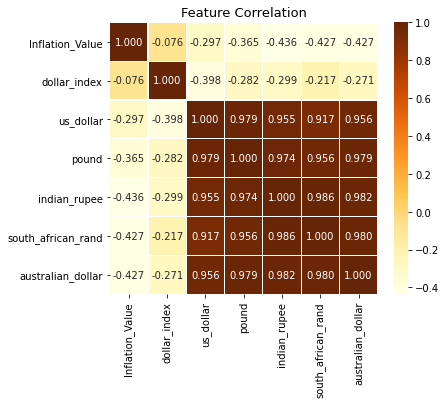

In [85]:
corr = data.corr()
plt.figure(figsize = (6,5))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,fmt='.3f',linewidths=0.2, cmap='YlOrBr')
plt.title('Feature Correlation', y = 1.12, size=13, loc="center")

# **USA Model**

In [91]:
from sklearn.model_selection import train_test_split
temp = data[['Inflation_Value', 'dollar_index']]
y_temp = data[['us_dollar']]
x = temp.iloc[:,:].values
y= data.loc[:,['us_dollar']].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [92]:
y_pred = regressor.predict(x_test)
y_pred

array([1139.34012102,  681.50352995,  441.063053  ,  585.52508019,
        547.13147727, 1146.67809494,  596.03971278,  872.49943184,
        632.41553834, 1046.55136282, 1462.70455862,  975.02520381,
        363.59516774,  463.36614693,  397.51484939, 1313.29157728,
        307.37187621,  424.61172433,  376.48351717,  476.25645964,
        560.96570877,  522.59731772,  411.50606297, 1154.09768321,
       1379.88124938,  403.90641717,  420.52199231, 1151.14039156,
        309.09217002,  677.20319047, 1339.63419891,  398.10320262,
       1190.49299658,  358.82025985,  395.42359317,  948.14506884,
        677.07911746,  601.08411422,  376.48351717,  435.40683613,
        397.06459426,  378.40941558, 1113.18447741, 1037.36357639,
        462.59069761, 1436.11672593, 1082.65744821,  449.22605388,
        909.12632737,  376.59949146,  585.84476082, 1632.32901843,
        822.46732798,  456.95361848,  365.29962819, 1087.00382955,
       1149.58688331,  477.31700491, 1276.31649729,  419.67033

In [93]:
accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print("Training Accuracy: ", accuracy_train)
print("Testing Accuracy: ", accuracy_test)

Training Accuracy:  0.9349776197989598
Testing Accuracy:  0.5690435255832689


In [94]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   182.25470202318704
MSE :   87314.97829610611
RMAE :   295.4910798926189


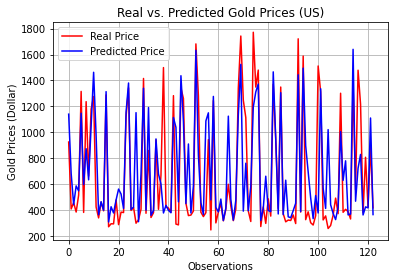

In [96]:
plt.plot(y_test, color = 'Red', label = 'Real Price')
plt.plot(y_pred, color = 'Blue', label = 'Predicted Price')
plt.grid(2.5)
plt.title('Real vs. Predicted Gold Prices (US)')
plt.xlabel('Observations')
plt.ylabel('Gold Prices (Dollar)')
plt.legend()
plt.show()

In [103]:
money = regressor.feature_importances_
money

array([0.32341969, 0.67658031])

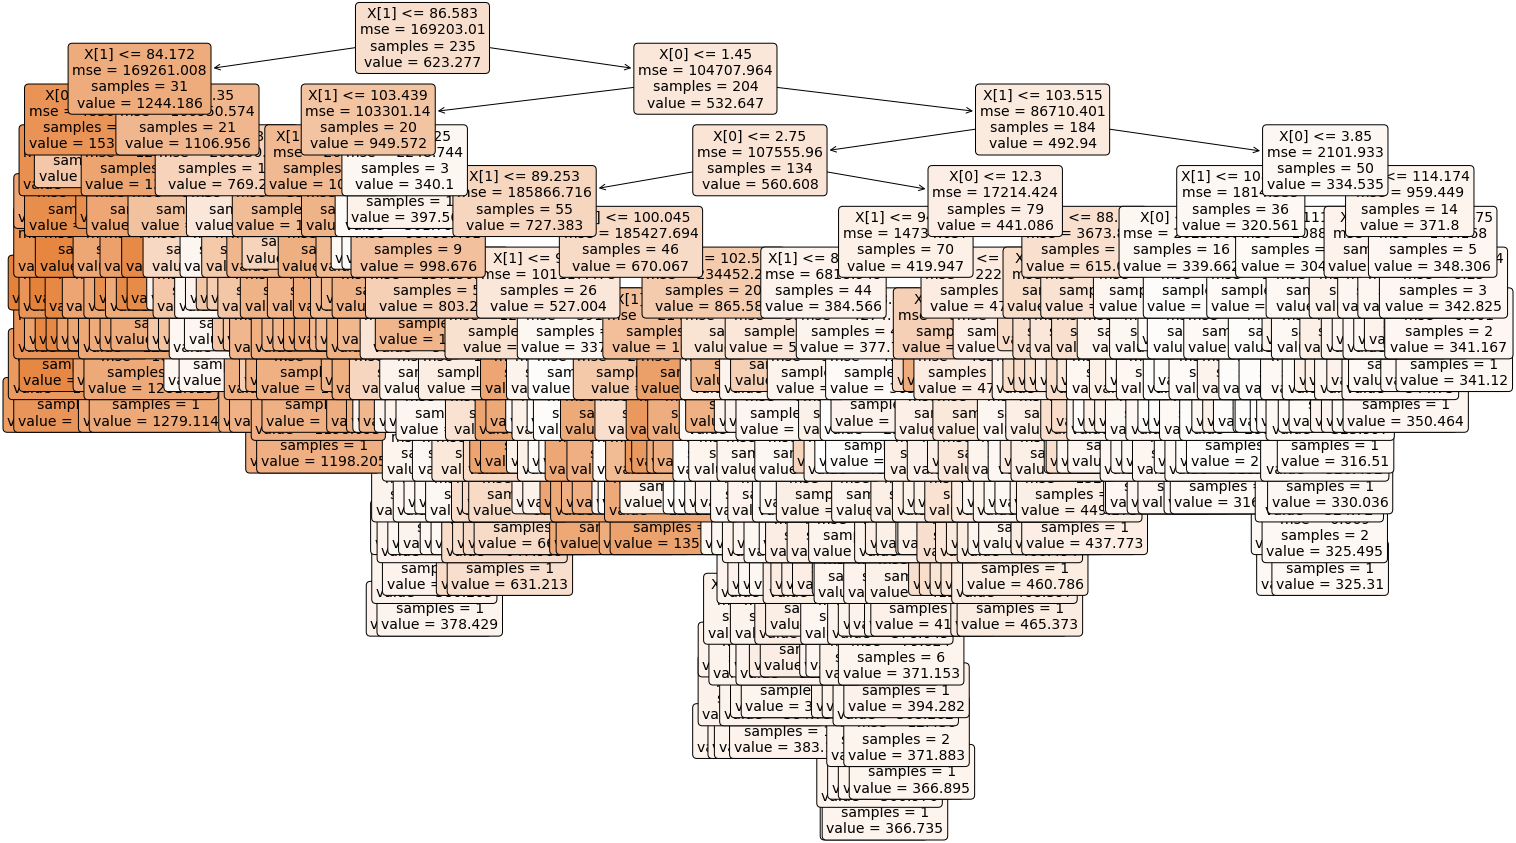

In [106]:
import pydot
# Pull out one tree from the forest
Tree = regressor.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);